**Analyse der Herausforderungen und Visionen**

Sjoberg et al. stellen in ihrer Arbeit "The Future of Empirical Methods in Software Engineering Research" Herausforderungen der empirischen Forschung dar. Für jede diese Herausforderungen wurde zum einen der aktuelle Stand der Praxis beschrieben und zum anderen Visionen dargestellt, wie sie sich diesen Stand in der Zukunft (2020-2025) vorstellen. In meiner Bachelorarbeit zu dem Thema "" wurden aus diesen Herausforderungen und Visionen Fragen abgeleitet. In diesem Jupyter Notebook werden einige dieser Fragen aufgenommen und mit der aktuellen entwickelten Semantischen Struktur und den damit gesammelten Daten beantwortet. 

**1. Welche empirischen Methoden verwenden Forscher im Bereich des RE?** <br> 
**2. Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?**<br>
**3. Wie hoch ist der Anteil bei der Verwendung von Umfragen, Fallstudien und Action Research im RE?**<br>
**4. Wie hat sich die Nutzung dieser drei Methoden(Umfrage, Fallstudie, Aktionsforschung) in den vergangenen Jahren entwickelt?**<br>
**7. Welche statistische Methoden werden in der Forschung im RE verwendet?**<br>
**6. Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?**<br>
**8. Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht?**<br>
**9. Welche Daten werden von Forscher veröffentlicht?**<br>
**10. Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?**<br>
**11. Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?**<br>
**12. Verwenden Forschungen mehr als eine Forschungsmethode?**<br>
**13. Welche Forschungsmethoden werden Kombiniert?**<br>
**14. Welche Kombinationen aus data collection methods und analysis methods werden verwendet?**


In [ ]:
import sparql_dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

endpoint_url = "https://orkg.org/triplestore"

PREFIX = """
        PREFIX orkgr: <http://orkg.org/orkg/resource/>
        PREFIX orkgc: <http://orkg.org/orkg/class/>
        PREFIX orkgp: <http://orkg.org/orkg/predicate/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        """

**1. Welche empirischen Forschungsmethoden verwenden Forscher im Bereich des RE?**<br>
**2. Wie hat sich die Verwendung der Methoden in den letzten Jahren geändert?**

In [ ]:
query = """
        SELECT ?contribution, ?year, ?experiment, ?survey, ?interview, ?study, ?secondary_research, ?action_research
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?paper orkgp:P29 ?year.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007/rdfs:label ?experiment}
              OPTIONAL{?data_collection_method orkgp:P57036/rdfs:label ?survey}
              OPTIONAL{?data_collection_method orkgp:P57034/rdfs:label ?interview.}
              OPTIONAL{?data_collection_method orkgp:P57040/rdfs:label ?study.}
              OPTIONAL{?data_collection_method orkgp:P57021/rdfs:label ?secondary_research.}
              OPTIONAL{?data_collection_method orkgp:P57020/rdfs:label ?action_research.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
#get oldest year
start_year = data.sort_values(by=['year'])['year'].iloc[0]
cm = []
values = []
for col in range(1, len(data.columns)):
        cm.append(data.columns[col])
        values.append(data[data.columns[col]].value_counts().sum())
pd.DataFrame(data={'collection method': cm, 'amount':values}).plot(kind='barh', x='collection method', y='amount', title="Empirical Research Methods")

In [ ]:
#action reserach methods
fig, ax = plt.subplots(ncols=2)
data['action_research'].value_counts().plot(kind='barh', title="Action Research Methods", ax=ax[0])
data.groupby('year')['action_research'].count().plot(kind='bar', title='Action Research usage since {year}'.format(year=start_year), ax=ax[1], figsize=(10,5))

In [ ]:
#secondary research methods
fig, ax = plt.subplots(ncols=2)
data['secondary_research'].value_counts().plot(kind='barh', title="Secondary Research Methods", ax=ax[0])
data.groupby('year')['secondary_research'].count().plot(kind='bar', title='Secondary Research usage since {year}'.format(year=start_year), ax=ax[1], figsize=(10,5))

In [ ]:
#study methods
fig, ax = plt.subplots(ncols=2)
data['study'].value_counts().plot(kind='barh', title="Study Methods", ax=ax[0])
data.groupby('year')['study'].count().plot(kind='bar', title='Study usage since {year}'.format(year=start_year), ax=ax[1], figsize=(10,5))

In [ ]:
#interview methods
fig, ax = plt.subplots(ncols=2)
data['interview'].value_counts().plot(kind='barh', title="Interview Methods", ax=ax[0])
data.groupby('year')['interview'].count().plot(kind='bar', title='Interview usage since {year}'.format(year=start_year), ax=ax[1], figsize=(10,5))

In [ ]:
#survey methods
fig, ax = plt.subplots(ncols=2)
data['survey'].value_counts().plot(kind='barh', title="Survey Methods", ax=ax[0])
data.groupby('year')['survey'].count().plot(kind='bar', title='Survey usage since {year}'.format(year=start_year), ax=ax[1], figsize=(10,5))

In [ ]:
#experiment methods
fig, ax = plt.subplots(ncols=2)
data['experiment'].value_counts().plot(kind='barh', title="Experiment Methods", ax=ax[0])
data.groupby('year')['experiment'].count().plot(kind='bar', title='Experiment usage since {year}'.format(year=start_year),ax=ax[1], figsize=(10,5))

In [ ]:
data.groupby(['year']).count().plot(kind='bar', figsize=(15,7), title='Change of method usage since {year} (all methods)'.format(year=start_year))

**Wie hoch ist der Anteil bei der Verwendung von surveys, case studies und action research im RE?** 

In [ ]:
query = """
        SELECT ?year, ?surveys, ?action_research, ?case_studies
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?contribution orkgp:P56008 ?collection.
              ?paper orkgp:P29 ?year.
              OPTIONAL{?collection orkgp:P57036 ?surveys.}
              OPTIONAL{?collection orkgp:P57020 ?action_research.}
              OPTIONAL{?collection orkgp:P57040/rdfs:label ?case_studies.
                FILTER regex(?case_studies, "case study", "i")}
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_of_survey = data['surveys'].value_counts().sum()
number_of_action_research = data['action_research'].value_counts().sum()
number_of_case_studies = data['case_studies'].value_counts().sum()
all = number_of_action_research + number_of_case_studies + number_of_survey
method_data = pd.DataFrame({'research methods':[number_of_survey, number_of_action_research, number_of_case_studies, len(data) - all]}, index=['survey', 'action research', 'case studies', 'other'])
method_data.plot(kind='pie',  y='research methods', autopct='%1.0f%%', figsize=(5,5))

Beschreibung

**Wie hat sich die Nutzung dieser drei Methoden (survey, case studies und action research) in den vergangenen Jahren entwickelt?**

In [ ]:
data.groupby('year').count().plot(kind='bar', figsize=(10,5))

Beschreibung

**Welche statistischen Methoden werden in der Forschung im RE verwendet?**
Eine weitere Vision betrifft 

In [ ]:
query = """
        SELECT ?year, ?maximum, ?mean, ?median, ?minimum, ?variance, ?skewness, ?kurtosis, ?standard_deviation, ?count, ?percentage, ?hypothesis_tests, ?regression
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper orkgp:P29 ?year.
              ?contribution orkgp:P15124 ?analysis.
              OPTIONAL{?analysis orkgp:P56048 ?descriptive.
                OPTIONAL{?descriptive orkgp:P57005 ?tendency.
                    ?tendency orkgp:P44108 ?maximum.
                    ?tendency orkgp:P47000 ?mean.
                    ?tendency orkgp:P57006 ?median.
                    ?tendency orkgp:P44107 ?minimum.
                    ?tendency orkgp:P57007 ?mode.}
                OPTIONAL{?descriptive orkgp:P57008 ?dispersion.
                    ?dispersion orkgp:P4013  ?range.
                    ?dispersion orkgp:P44087 ?standard_deviation.
                    ?dispersion orkgp:P57009 ?variance.
                    ?dispersion orkgp:P59063 ?skewness.
                    ?dispersion orkgp:P59064 ?kurtosis.}
                OPTIONAL{?descriptive orkgp:P56049 ?frequency.
                    ?frequency orkgp:P55023 ?count.
                    ?frequency orkgp:P56050 ?percentage.}
                }
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56044/rdfs:label ?hypothesis_tests.}
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56045/rdfs:label ?regression.}    
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
start_year = data.sort_values('year')['year'].iloc[0]
descriptive = data.iloc[:, 1:11]
#plot descriptive methods
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Methods of Descriptive statistics", fontsize=18, y=0.95)
for n, col in enumerate(descriptive.columns):
    ax = plt.subplot(2, 5, n + 1)
    if descriptive[descriptive[col] == True][col].sum() > 0:
        descriptive[descriptive[col] == True][col].value_counts().plot(kind='bar', ax=ax)
        #descriptive[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)


In der deskriptive Statistik verwenden Forscher eine Vielfalt von verschiedenen statistischen Analyse Methoden. Dabei wird die Angabe von Prozenten, mit 40-mal, sowie Zählungen mit 36-mal am häufigsten verwendet. 

In [ ]:
#plot inferential methods
fig, (ax, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=1.5)
data['hypothesis_tests'].value_counts().plot(kind='barh', figsize=(5,7), title='Hypothesis Tests', ax=ax)
data['regression'].value_counts().plot(kind='barh', title='Regression Analysis', ax=ax2)
plt.show()

In dem Diagramm zu Hypothesen Tests ist zusehen, dass Forscher eine große Vielfalt unterschiedlicher Tests verwenden. Hierbei werden am häufigsten der Wilcoxon signed-rank test, der Mann-Whitney-U-Test und der t-test verwendet. Bei der Regressionsanalyse werden die Methoden multi-level, multiple, und lineare Regression verwendet, diese machen mit insgesamt nur fünf verwendungen einen geringen Anteil aus in der Analyse aus.

**Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?**

In [ ]:
#descriptive methods over years
descriptive = data.iloc[:, :11]
colormap = plt.cm.nipy_spectral 
colors = [colormap(i) for i in np.linspace(0, 0.9, 10)]
descriptive.groupby('year').count().plot(kind='bar', figsize=(10,5), color=colors, title='Usage of Descriptive Statistic Methods since {year}'.format(year=start_year))

In diesem Diagramm wird die zeitliche Veränderung bei Nutzung von deskriptiven Analyse Methoden dargestellt. Hierbei ist auffällig, dass die Angabe von Prozenten und Zählungen in den Jahren 2015-2017 sehr hoch gewesen ist, aber im Jahr 2018 sehr stark abgesunken ist und seitdem auch nur sehr wenig genutzt wird. Die Methoden Varianz, skewness, kurtosis standard Abweichung steigen bis 2018 an, sinken dann aber in den darauffolgenden Jahren wieder ab. Im Jar 2020 wurden diese Methoden gar nicht verwendet. In diesem Diagramm ist auch erkennbar, dass einige Methoden häufig in Kombination verwendet, wie z.B. maximum, minimum, Durchschnitt und Median oder auch Prozente und Zählungen.

In [ ]:
#inferential methods over years
plt.figure()
data.groupby('year')['hypothesis_tests', 'regression'].count().plot(kind='bar', title='Usage of Inferential Statistic Methods since {year}'.format(year=start_year))

Beschreibung

**Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht?**

In [ ]:
query = """
        SELECT ?contribution, ?data
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P56008/orkgp:DATA/orkgp:P17001/rdfs:label ?data.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
available_data = data['data'].value_counts().sum()
test = pd.DataFrame({'Data':[available_data, len(data) - available_data]}, index=['dataset_available', 'overall contributions'])
test.plot(kind='pie', y='Data', autopct='%1.0f%%', title="Available data") 

In [ ]:
data['data'].value_counts().plot(kind='barh', title="Provided data")
data[data['data'] == 'open source']

Aus diesem Diagramm ist erkennbar, dass Forscher vor allem Datensätze, wie Tabellen oder,  veröffentlichen. Material, Fragebögen oder Ablauf

**Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?**

In [ ]:
query = """
        SELECT ?contribution, ?highlighted, ?hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P57004 ?research_question_answer.
                OPTIONAL{?research_question_answer orkgp:P55039 ?highlighted.
                         ?research_question_answer orkgp:P55038 ?hidden.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['highlighted'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))

Anhand dieses Diagramms ist erkennbar, dass nur 11% der aktuell im ORKG beschriebenen Contributions im Bereich des RE eine Antwort auf eine Forschungsfrage explizit im Text geben.

**Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?**

In [ ]:
query = """
        SELECT ?contribution, ?secondary
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              OPTIONAL{?contribution orkgp:P56008/orkgp:P57021/rdfs:label ?secondary.
              FILTER regex(?secondary, "(literature|systematic)", "i")}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_systematic_studies = data['secondary'].value_counts().sum()
systematic_studies = pd.DataFrame({'methods':[number_systematic_studies, len(data) - number_systematic_studies]}, index=['systematic studies', 'other'])
systematic_studies.plot(kind='pie', y='methods', autopct='%1.0f%%', figsize=(5,5))

Dieses Diagramm zeigt den Anteil von verwendeten systematischen Studien, wie Systematische Literaturrecherchen oder Systematische Mappingstudien, im vergleich zu den anderen Forschungsmethoden. Dabei machen diese Studien 11% der Forschungsmethoden aus.

**Verwenden Forschungen mehr als eine Forschungsmethode?**

In [ ]:
query = """
        SELECT ?contribution, ?collection
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/rdfs:label ?collection.
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data = data[data['collection'] != 'collection']
combined = data[data.duplicated(['contribution'], keep=False)]
combined['contribution'].value_counts().plot(kind='barh')

Dieses Diagramm zeigt die Studien, die zwei oder mehr unterschiedliche Forschungsmethoden verwende.

Welche Methoden werden Kombiniert?

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x=combined['collection'], y=combined['contribution'])
plt.xticks(rotation=90)
plt.show()

Dieses Diagramm zeigt die Studien, mehr als eine Forschungsmethode verwendet haben und welche Methoden in dieser Studie kombiniert wurden.

**Welche Kombinationen aus data collection methods und analysis methods werden verwendet?**

In [126]:
query = """
        SELECT ?experiment, ?study, ?survey, ?secondary_research, ?interview, ?action_research, ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                OPTIONAL{?contribution orkgp:P56008/orkgp:P1007 ?experiment.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57040 ?study.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57036 ?survey.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57021 ?secondary_research.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57034 ?interview.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57020 ?action_research}

                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data[~data['action_research'].isnull()]

,experiment,study,survey,secondary_research,interview,action_research,descriptive,inferential,coding,machine,error,reg,regularity,comparative,sentiment,in_depth,behavioural,stakeholder,literature,artefact
101,NaN,http://orkg.org/orkg/resource/R195171,http://orkg.org/orkg/resource/R195159,NaN,http://orkg.org/orkg/resource/R194246,http://orkg.org/orkg/resource/R195167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R193812,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,http://orkg.org/orkg/resource/R195171,http://orkg.org/orkg/resource/R195159,NaN,http://orkg.org/orkg/resource/R198915,http://orkg.org/orkg/resource/R195167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://orkg.org/orkg/resource/R193812,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Analysis method in combination with Action Research'}, ylabel='usage'>

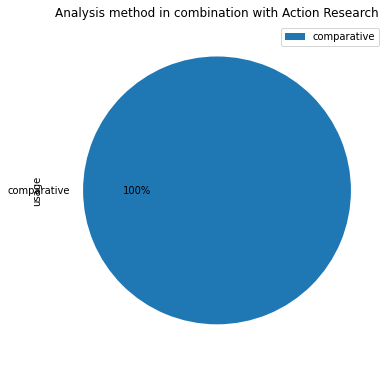

In [131]:
#Action research with analysis methods
methods = []
amount = []
action_reserach_data = data[~data['action_research'].isnull()]
for col in range(6, len(action_reserach_data.columns)):
        if action_reserach_data[action_reserach_data.columns[col]].value_counts().sum() != 0:
                methods.append(action_reserach_data.columns[col])
                amount.append(action_reserach_data[action_reserach_data.columns[col]].value_counts().sum())
action_reserach_data = pd.DataFrame({'usage': amount}, index=methods)
action_reserach_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,7), title="Analysis method in combination with Action Research")

<AxesSubplot:title={'center':'Analysis method in combination with Secondary Research'}, ylabel='usage'>

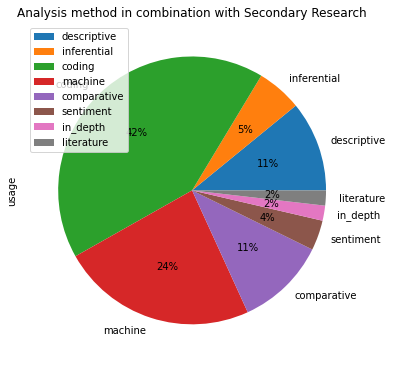

In [130]:
#secondary research with analysis methods
methods = []
amount = []
secondary_research_data = data[~data['secondary_research'].isnull()]
for col in range(6, len(secondary_research_data.columns)):
        if secondary_research_data[secondary_research_data.columns[col]].value_counts().sum() != 0:
                methods.append(secondary_research_data.columns[col])
                amount.append(secondary_research_data[secondary_research_data.columns[col]].value_counts().sum())
secondary_research_data = pd.DataFrame({'usage': amount}, index=methods)
secondary_research_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,7), title="Analysis method in combination with Secondary Research")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Sekundärer Forschung verwendet werden. Hirebi wird vor allem Coding, mit einem Anteil von 42%, verwendet. Machine learning macht mit einem Anteil von 24% fast ein viertel der Analysemethoden aus.

<AxesSubplot:title={'center':'Analysis methods in combination with Studies'}, ylabel='usage'>

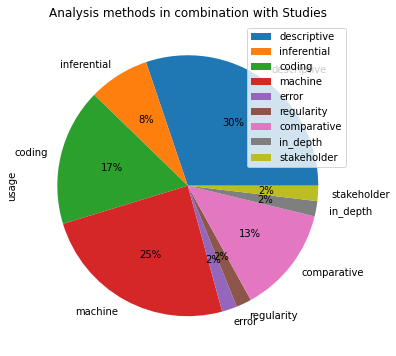

In [132]:
#study with analysis methods
types = []
amount = []
study_data = data[~data['study'].isnull()]
for col in range(6, len(study_data.columns)):
        if study_data[study_data.columns[col]].value_counts().sum() != 0:
                types.append(study_data.columns[col])
                amount.append(study_data[study_data.columns[col]].value_counts().sum())
study_data = pd.DataFrame({'usage': amount}, index=types)
study_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis methods in combination with Studies")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Studien verwendet werden. Studien werden hauptsächlich mit deskriptive Analysemethoden (30%), machine learning (25%) und Coding (17%) analysiert.

<AxesSubplot:title={'center':'Analysis method in combination with Interviews'}, ylabel='usage'>

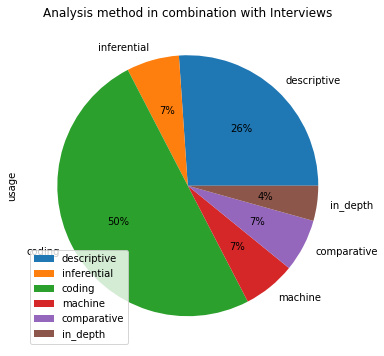

In [134]:
#interviews with analysis methods
methods = []
amount = []
interview_data = data[~data['interview'].isnull()]
for col in range(6, len(interview_data.columns)):
        if interview_data[interview_data.columns[col]].value_counts().sum() != 0:
                methods.append(interview_data.columns[col])
                amount.append(interview_data[interview_data.columns[col]].value_counts().sum())
interview_data = pd.DataFrame({'usage': amount}, index=methods)
interview_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis method in combination with Interviews")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Interviews verwendet werden. Dabei wird mit 50% am häufigsten mit dem Einsatz von Coding analysiert gefolgt von  deskriptiven Analysemethoden mit 26%.

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

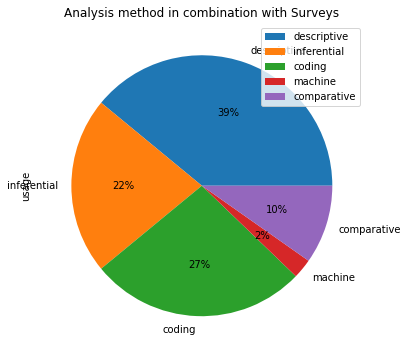

In [135]:
#survey with analysis methods
methods = []
amount = []
survey_data = data[~data['survey'].isnull()]
for col in range(6, len(survey_data.columns)):
        if survey_data[survey_data.columns[col]].value_counts().sum() != 0:
                methods.append(survey_data.columns[col])
                amount.append(survey_data[survey_data.columns[col]].value_counts().sum())
survey_data = pd.DataFrame({'usage': amount}, index=methods)
survey_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis method in combination with Surveys")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Umfragen verwendet werden. Bei Umfragen werden am häufigsten deskriptive Analysemethoden (39%) verwendet, gefolgt von Coding (27%) und statistischer Inferenz (22%).

<AxesSubplot:title={'center':'Analysis methods in combination with Experiment'}, ylabel='usage'>

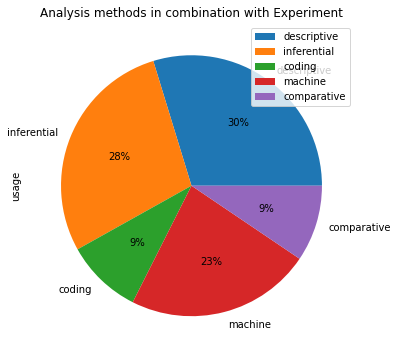

In [136]:
#experiment with analysis methods
methods = []
amount = []
experiment_data = data[~data['experiment'].isnull()]
for col in range(6, len(experiment_data.columns)):
        if experiment_data[experiment_data.columns[col]].value_counts().sum() != 0:
                methods.append(experiment_data.columns[col])
                amount.append(experiment_data[experiment_data.columns[col]].value_counts().sum())
experiment_data = pd.DataFrame({'usage': amount}, index=methods)
experiment_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis methods in combination with Experiment")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Experimenten verwendet werden. Dabei machen deskriptive Analysemthoden mit 30%, statistische Inferenz mit 28% und machine learning mit 23% den größten Anteil der Analysmethoden aus.